In [ ]:
curr_dir =  r"drive/MyDrive/Colab Notebooks/RagibNoor"
%cd "$curr_dir"

/content/drive/MyDrive/Colab Notebooks/RagibNoor


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import keras

First we build our base model, which is the InceptionV3. Weights will not be trained in this layer.
Add the outputs from inception to Flatten Layer.
Then, back to our deep neural network.

In [ ]:
image_shape = (224, 224, 3)

Build Model

In [ ]:
base_model = InceptionV3(input_shape=image_shape, include_top = False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

X = Flatten()(base_model.output)
X = Dense(units=2, activation='sigmoid')(X) ## classify 2 classes. May try relu instead of sigmoid

# Final Model
model = Model(base_model.input, X)

# Compile model
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

# Summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

Build Training Data

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center = True,
                                   rotation_range = 0.3,
                                   width_shift_range = 0.2,
                                   horizontal_flip = True,
                                   preprocessing_function = preprocess_input)

train_data = train_datagen.flow_from_directory(directory='data/train',
                                               target_size = (224, 224),
                                               batch_size = 36)


valid_datagen = ImageDataGenerator(featurewise_center = True,
                                   preprocessing_function = preprocess_input)

valid_data = valid_datagen.flow_from_directory(directory='data/val',
                                               target_size = (224, 224),
                                               batch_size = 36)

Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Normal': 0, 'OSCC': 1}

Plot Images

In [ ]:
t_img, label = train_data.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
def plotImages(img_arr, label):
  for idx, img in enumerate(img_arr):
    if idx <= 5:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


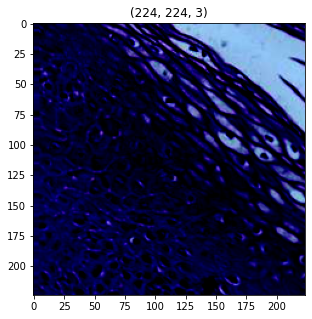

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


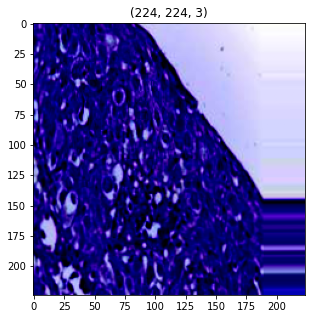

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


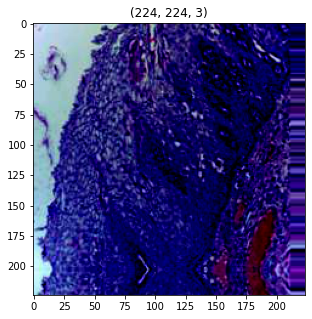

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


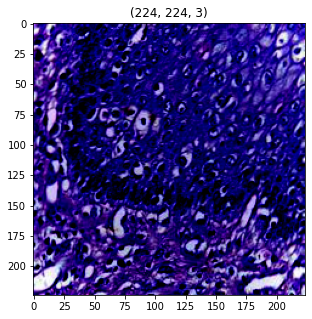

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


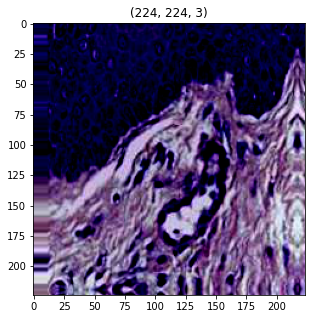

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


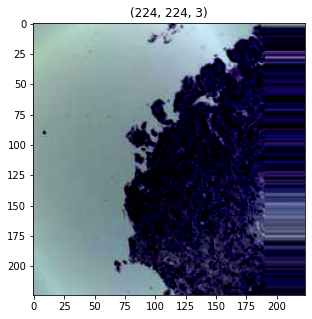

In [ ]:
plotImages(t_img, label)

Model Checkpoint

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint = ModelCheckpoint(filepath="./best_model.h5",
                                   monitor = "accuracy",
                                   verbose=1,
                                   save_best_only=True)

early_stopping = EarlyStopping(monitor="accuracy",
                               min_delta=0.01,
                               patience=10,
                               verbose=1)

callback = [model_checkpoint, early_stopping]

In [ ]:
history = model.fit_generator(train_data, validation_data=valid_data, steps_per_epoch = 10,
                              epochs = 40, callbacks = callback)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
10/10 [==============================] - ETA: 0s - loss: 4.1201 - accuracy: 0.5361
Epoch 1: accuracy improved from -inf to 0.53611, saving model to ./best_model.h5
10/10 [==============================] - 95s 9s/step - loss: 4.1201 - accuracy: 0.5361 - val_loss: 6.6561 - val_accuracy: 0.2333
Epoch 2/40
10/10 [==============================] - ETA: 0s - loss: 2.9250 - accuracy: 0.5917
Epoch 2: accuracy improved from 0.53611 to 0.59167, saving model to ./best_model.h5
10/10 [==============================] - 27s 3s/step - loss: 2.9250 - accuracy: 0.5917 - val_loss: 4.1860 - val_accuracy: 0.4250
Epoch 3/40
10/10 [==============================] - ETA: 0s - loss: 2.2015 - accuracy: 0.6861
Epoch 3: accuracy improved from 0.59167 to 0.68611, saving model to ./best_model.h5
10/10 [==============================] - 27s 3s/step - loss: 2.2015 - accuracy: 0.6861 - val_loss: 1.1486 - val_accuracy: 0.6917
Epoch 4/40
10/10 [==============================] - ETA: 0s - loss: 1.3106 - accur

Model Performance

In [ ]:
from keras.models import load_model
model = load_model("best_model.h5")

In [ ]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

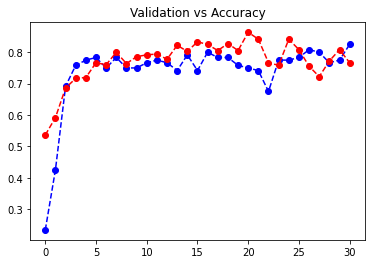

In [ ]:
plt.plot(h['val_accuracy'], 'go--', c='blue')
plt.plot(h['accuracy'], 'go--', c='red')

plt.title("Validation vs Accuracy")
plt.show()

Validate Model

In [ ]:
def single_prediction(path):
  img = load_img(path, target_size = (224, 224))

  i = img_to_array(img)
  i = preprocess_input(i)

  input_arr = np.array([i])
  input_arr.shape

  pred = np.argmax(model.predict(input_arr))

  if pred == 0:
    print("Normal Scan Detected")
  else:
    print("Oral Cancer Detected")

  plt.imshow(input_arr[0])
  plt.title("Input image")
  plt.axis = False
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Oral Cancer Detected


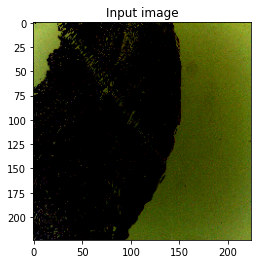

In [ ]:
path = r"/content/drive/MyDrive/Colab Notebooks/RagibNoor/data/test/OSCC/OSCC_100x_305.jpg"
single_prediction(path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Normal Scan Detected


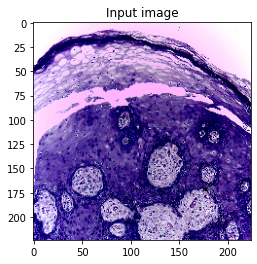

In [ ]:
path = r"/content/drive/MyDrive/Colab Notebooks/RagibNoor/data/test/Normal/Normal_100x_12.jpg"
single_prediction(path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Normal Scan Detected


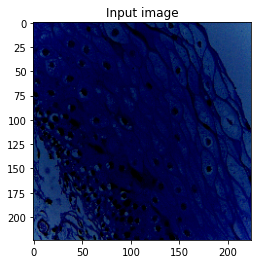

In [ ]:
path = r"/content/drive/MyDrive/Colab Notebooks/RagibNoor/data/test/Normal/Normal_400x_197.jpg"
single_prediction(path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Oral Cancer Detected


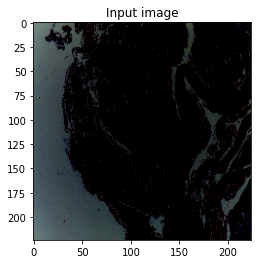

In [ ]:
path = r"/content/drive/MyDrive/Colab Notebooks/RagibNoor/data/test/OSCC/OSCC_100x_53.jpg"
single_prediction(path)